In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation 

We will first start by generating two clusters of data points. Then our task in this exercise is to define a boundary that separates the clusters, given a few observations from each cluster. When new data arrives, we can easily decide which cluster the new observation actually belongs to, i.e. **classifying** the new observation to one of the two clusters.   

*Run the below 3 code blocks and observe the two clusters of data points in the plot.* 

In [16]:
cluster_centres = np.array([[-1, -3], [2, 2]])
colour_list = ['red', 'blue']

def generateData(num_samples_pc, dimensions=2, cluster_locs=cluster_centres):
    data = []
    labels = []

    for c, locs in enumerate(cluster_locs):
        pos = np.random.randn(num_samples_pc, dimensions) + locs
        data.append(pos)
        labels.append(np.ones(num_samples_pc) * c)

    data_np = np.concatenate(data, axis=0)
    labels_np = np.concatenate(labels, axis=0)
    return data_np, labels_np

train_data, train_labs = generateData(100)
test_data, test_labs = generateData(10)

In [17]:
def plot_data(data, labs, a=None, b=None, c=None, color=colour_list):
  plt.xlim([-8, 8])
  plt.ylim([-8, 8])
  for ic in range(2):
      ind_class = np.where(labs == ic)
      #color = plt.cm.Set1(ic)
      plt.scatter(data[ind_class, 0], data[ind_class, 1], s=10, color=color[ic], label=str(ic))

  if a is not None and b is not None and c is not None:
    x = np.linspace(-8, 8, 10)
    y = ( - b * x - c) / a
    plt.plot(x, y)
    
  plt.ylabel("x2")
  plt.xlabel("x1")
  plt.gca().set_aspect('equal')
  plt.show()

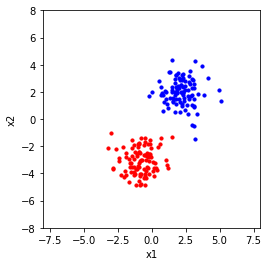

In [18]:
plot_data(train_data, train_labs)

# Decision boundary

* The decision boundary is a line which separates out the data points from different clusters.

* If we have a data point $\mathbf{x}$ that we want to classify, where $\mathbf{x} = \{x_1, x_2\}$ -- a 2D feature vector. Then the predicted class depends on which side of the line $\mathbf{x}$ lies.

* We represent the decision boundary of the form: $f(\mathbf{x}) = ax_1 + bx_2 + c = 0$.

* This allows us to easily compute which side of the line the point lies from looking at the sign of $f(\mathbf{x}) = ax_1 + bx_2 + c$.

* A positive sign indicates that the data point $\mathbf{x}$ belongs to the blue class, and a negative sign indicates red.



# Sigmoid function

* The sigmoid function is defined as: $\sigma (t) =\frac{1}{1 + exp(-t)}$

* The sigmoid function has some very nice properties (see the lecture note). An important one is that the value of the sigmoid function always lies in between 0 and 1. Hence, it's a perfect tool to model probability distributions. 

* Here, we use the sigmoid function to represent the probability that a data point $\mathbf{x}$ is from a certain class $\mathcal{C}_i$, where $i$ is either 0 or 1.

## Task 1: Implement sigmoid function

*TODO: Implement the sigmoid function in the code block below.*

Hint: Consider to use the `np.exp()` function. 

In [19]:
cluster_centres = np.array([[-1, -3], [2, 2]])

def sigmoid(x):
  exp= np.exp(-1*x)
  sigmoid_value= 1/(1+exp)
  return sigmoid_value

print(sigmoid(cluster_centres))

print(cluster_centres + 1)

[[0.26894142 0.04742587]
 [0.88079708 0.88079708]]
[[ 0 -2]
 [ 3  3]]


Let's plot the sigmoid function using the function below to see its shape.

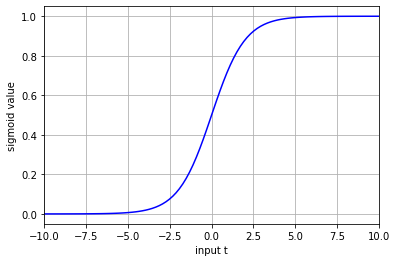

In [20]:
t = np.linspace(-10, 10, 100)
sigmoid_t = sigmoid(t)
plt.plot(t, sigmoid_t, 'b-')
plt.xlim([-10, 10])
#plt.gca().set_aspect('equal')
plt.xlabel("input t")
plt.ylabel("sigmoid value")
plt.grid(True)
plt.show()

Now can we combine the sigmoid function with the equation of our linear decision boundary to get a predictive probability for the class labels of a 2D data point?

* Think about the output of the function $ay + bx + c$ and how that could work with the sigmoid function.

* HINT: If a point lies on the line $ay + bx + c = 0$ what is the probability that it belongs to each class?

## Task 2: Predictive probability of a data point

* TODO: Implement a function which gives the predictive probability $p(\mathbf{x})$ of 2D data points $\mathbf{x}=(x_1, x_2)$ being in the blue class for the given values for `a`, `b` and `c`. You will need to use the sigmoid function and evaluate $ay + bx + c$. 


In [21]:
def predictive_prob(x, a, b, c):
  feat1=x[:,0].reshape(x.shape[0],1)
  feat2=x[:,1].reshape(x.shape[0],1)
  z=a*feat1+b*feat2+ c
  pred_prob=sigmoid(z)
  return pred_prob
print(cluster_centres)
print(predictive_prob(cluster_centres,1,1,1))
print(cluster_centres[:,1])

[[-1 -3]
 [ 2  2]]
[[0.04742587]
 [0.99330715]]
[-3  2]


# Learning Objective: Binary Cross-Entropy Loss

* We want to find a way to automatically infer the decision boundary.

* The best decision boundary is the one which will assign a low probability of a data point being `blue` if it actually belongs to the `red` class and a probability of a data point being `red` if it does belong to the `red` class.

* We use the Binary Cross Entropy loss to work out the decision boundary.

$$
\mathcal{L} = \sum_{i=1}^{N}- y_i\log(p(\mathbf{x}_i)) - (1 - y_i)\log(1 - p(\mathbf{x}_i))
$$

* Where $y_i$ represent $i$th element of `train_labs`, which is a vector of 0s and 1s. Here 0 indicates that the corresponding $i$th data point in `train_data` is `red` and 1 indicates that it is `blue`. $\mathbf{x}_i$ is a data point in `train_data` and $p(\mathbf{x}_i)$ represents our predictive probability that $\mathbf{x}_i$ is blue.


### Task 3: Implement the binary cross entropy loss.

*TODO: Implement the BCE loss in the function below.* 

In [22]:
#import math
def log_fun(arg):
    log_res= np.log(arg,where=arg>0)
    log_res[arg<=0]=0
    return log_res
def bce_loss(pred_probs, y):
  y=y.reshape(y.shape[0],1)
  term_1=np.multiply(-1*y,log_fun(pred_probs))
  term_2=np.multiply(1-y,log_fun((1-pred_probs))) 
  bce = np.sum(term_1-term_2)
  #print(term_2)
  return bce

### Is BCE a good metric for how well our decision boundary seperates our data?

Play around with the vlaues of `a`, `b`, and `c` below to see how they effect the values of BCE loss.



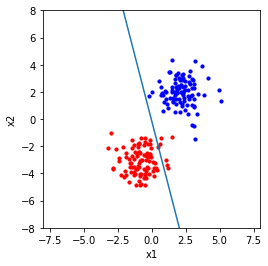

BCE loss: 19.74900557843708


In [23]:
a=8
b=31
c=1

plot_data(train_data, train_labs, a, b, c)
print("BCE loss: " + str(bce_loss(predictive_prob(train_data, a, b, c), train_labs)))

# Optimization with Gradient Descent (GD)

* Gradient descent is a way to minimize (or maximize) a function, just think of it as walking down a hill.

* If you want to walk down a hill from a random point, you'd choose a direction which points down, and then take a step.

* That's what we do a lot in machine learning (literally, this is what everyone uses all the time), but rather than take a physical step, we just move the parameters by a certain amount which we call a step. 

* For GD to be useful, we need to calculate the gradient of our loss function.

* The gradients for BCE are:

$$
\frac{\partial\mathcal{L}}{\partial a} = \sum_{i=1}^{N}(\sigma(ax_1^i + bx_2^i + c) - y^i)x_1^i
$$

$$
\frac{\partial\mathcal{L}}{\partial b} = \sum_{i=1}^{N}(\sigma(ax_1^i + bx_2^i + c) - y^i)x_2^i
$$

$$
\frac{\partial\mathcal{L}}{\partial c} = \sum_{i=1}^{N}(\sigma(ax_1^i + bx_2^i + c) - y^i)
$$

Note that $(\mathbf{x}^i, y^i)$ refer to the $i$-th data points in our observations.


### Task 4: Implement the gradient of $a, b$ and $c$

*TODO: Complete the below code block to implement a function which returns the gradients of $a, b$ and $c$.* 

You can return multiple values from a function using `return grad_a, grad_b, grad_c`

In [41]:
def compute_gradients(x, a, b, c, y):  
  feat1=x[:,0].reshape(x.shape[0],1)
  feat2=x[:,1].reshape(x.shape[0],1)
  yi=y.reshape(y.shape[0],1)
  predicted_y=predictive_prob(x, a, b, c)
  diffy= predicted_y-yi
  grad_a=np.sum(np.multiply(diffy,feat1))
  grad_b=np.sum(np.multiply(diffy,feat2))
  grad_c=np.sum(diffy)
  return grad_a, grad_b, grad_c

In [42]:
compute_gradients(train_data, 1, 1, 1, train_labs)

(-2.915545200540125, -23.69508712812835, 8.405650611207516)

### Task 5: Implement the gradient descent algorithm.

* You will need the following equation to take a step:

$$
a^{t+1} = a^{t} - \alpha\cdot\frac{\partial\mathcal{L}}{\partial a^{t}}
$$

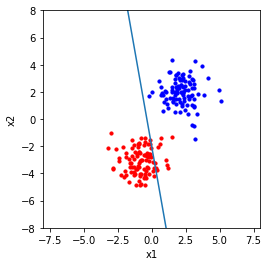

The optimised parameters are: a=7.038452465486421, b=16.14038094548289, c=6.3455501333441875
BCE loss: 0.024313318224385577


In [77]:
def optimize(train_data, train_labs, num_steps):
    a, b, c = 3, 17, 6
    lr = 0.09 #5e-3 #learning rate
    weights=np.array([a,b,c])
    for i in range(num_steps):
       grad_a, grad_b, grad_c = compute_gradients(train_data, weights[0], weights[1], weights[2], train_labs)
       grads=np.array([grad_a, grad_b, grad_c])
       weights = weights -lr*grads 
       #print(grads)
        
    if i % 10 == 0:
        print("Iteration %i\tLoss %.3f" % (i, bce_loss(predictive_prob(train_data, a, b, c), train_labs)))
        
    plot_data(train_data, train_labs, a, b, c)
    a=weights[0]
    b=weights[1]
    c=weights[2]
    return a, b, c

a_opt, b_opt, c_opt = optimize(train_data, train_labs, 1000)
print("The optimised parameters are: a=" + str(a_opt) + ", b=" + str(b_opt) + ", c=" + str(c_opt))

print("BCE loss: " + str(bce_loss(predictive_prob(train_data, a_opt, b_opt, c_opt), train_labs)))

What do you notice about the loss value? Is it doing what you expect?

# Evaluating a Classifier

We have now found out the parameters of a linear classifier. How well does it perform on the classification task on the 2D points? On what metric should we evaluate it on? Should we evaluate it on the **training set**, a set of data points that we use to estimate the classifier's parameters? Or should it be evaluated on a held-out **test set**, a set of data points that are reserved from training and only used for evaluating the model performance? What is the importance of having these two separate sets?

We explore these questions in this section. 



*   We often use the accuracy of a classifier as the performance metric.
*   It is defined as: $ \text{Accuracy} = \frac{\text{Number of correct prediction}}{\text{Number of total prediction}}$



## Task 6: Test set

To evaluate a classifier, we first need to use it to make some predictions. At the beginning of this notebook, we generated some test data alongside of the training data. Check in the Data Generation section and look for two variables called `test_data` and `test_labs`. 

In [57]:
print(test_data.shape, test_labs.shape)
print("Test data:", test_data)
print("Test labels:", test_labs)

(20, 2) (20,)
Test data: [[-0.34847382 -3.38834357]
 [-1.9391545  -5.01035184]
 [-2.16438443 -4.96946883]
 [-0.95027696 -3.77704977]
 [-3.36348155 -2.89083809]
 [-2.90534839 -1.43529358]
 [-1.7063996  -2.7827552 ]
 [-0.92940772 -2.86849886]
 [ 1.42873159 -5.11360946]
 [-0.6387704  -2.93646906]
 [ 0.62202782  3.3902036 ]
 [ 2.26210259  0.38693767]
 [-0.1196834   2.05819332]
 [ 1.49454499  2.84205988]
 [ 3.07582933  1.66679616]
 [ 1.65412378  1.81459193]
 [ 1.42499345  0.2151125 ]
 [ 1.45755817  4.06799463]
 [ 1.38778656  2.262495  ]
 [ 2.20493258  3.44265912]]
Test labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Task: Make prediction 

*TODO: can you make predictions using the $a, b, c$ values that you've found in Task 4b? Please complete the below code block.*  

In [58]:
def predict_labels(x, a, b, c):
  predic=predictive_prob(x, a, b, c).reshape(1,x.shape[0])
  #print(predic)
  pred_labels=predic 
  pred_labels[predic>=0.5]=1
  pred_labels[predic<0.5]=0
  return pred_labels

test_labs_predicted = predict_labels(test_data, a=a_opt, b=b_opt, c=c_opt)
print("Predictions: " , test_labs_predicted)
print("Real labels: ", test_labs)

Predictions:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Real labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Task: Compute accuracy

With the predicted labels `test_labs_predicted` from the previous task and the ground truth test labels `test_labs`, can you now evaluate the classifier's accuracy? 

*TODO: complete the below code block that computes the classifier's accuracy.

In [59]:
num_total=test_data.shape[0]
errors=np.sum(np.absolute(test_labs_predicted-test_labs))
#print(errors)
num_corr=num_total-errors
accuracy = num_corr/num_total

print(accuracy)

1.0
